In [4]:
# Michael Wasserstein
# Plot_Terrain_Difference_2_Runs.py
# 8/8/2023
# Script takes in WRF outputs and plots information about the domains being used, and the land surface use

####### Usage #########
# Conda environment - py37
# python /uufs/chpc.utah.edu/common/home/u1371671/WRF/Plotting_Scripts/Plot_Terrain_Difference_2_Runs.py -r 2 -p 2
# -r represents the run number you want to plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import glob
import wrf
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim, ALL_TIMES)
from netCDF4 import Dataset
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime
import os, sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u1371671/')
from map_script import *
import matplotlib as mpl
import pyart
from matplotlib.colors import ListedColormap


######## User input arguments #############
# import argparse
# parser = argparse.ArgumentParser()

# parser.add_argument("-r", "--run", help="WRF run of interest")
# parser.add_argument("-p", "--path", help="Wrf path - where is data (1 or 2")


# args = parser.parse_args()

# Get user inputs
run1 = '20'
path = 12
print('Plotting Domain for run', run1)

run_number = '{}'.format(run1).zfill(2)


def get_plot_element(infile):
    rootgroup = Dataset(infile, 'r')
    p = wrf.getvar(rootgroup, 'RAINNC')
    #lats, lons = wrf.latlon_coords(p)
    cart_proj = wrf.get_cartopy(p)
    xlim = wrf.cartopy_xlim(p)
    ylim = wrf.cartopy_ylim(p)
    rootgroup.close()
    return cart_proj, xlim, ylim

# paths for data
if path ==1:
    base_path = '/uufs/chpc.utah.edu/common/home/steenburgh-group12/michael/wrf/'
else:
    base_path = '/uufs/chpc.utah.edu/common/home/steenburgh-group12/michael/wrf{}/'.format(path)
    
WRF_path = base_path + 'wrf_runs/wrf_{}/run/'.format(run_number)

# paths for saving fig
Fig_dir1 = '/uufs/chpc.utah.edu/common/home/u1371671/WRF/Figures_{}/wrf_{}/'.format(path, run_number)

# load in all the wrf output data files
data_files_d01_run1 = glob.glob(WRF_path + '*wrfout_d01*') # for the outermost domain
data_files_d02_run1 = glob.glob(WRF_path + '*wrfout_d02*') # for the 2nd domain
data_files_d03_run1 = glob.glob(WRF_path + '*wrfout_d03*') # for the 3rd
#data_files_d04_run1 = glob.glob(WRF_path + '*wrfout_d04*') # for the innermost domain


# Get the netcdf file
ncfile_d01_run1 = Dataset(data_files_d01_run1[0])
ncfile_d02_run1 = Dataset(data_files_d02_run1[0])
ncfile_d03_run1 = Dataset(data_files_d03_run1[0])
#ncfile_d04_run1 = Dataset(data_files_d04_run1[0])


# Get the grid spaing going
d_01_gridspacing_run1 = ncfile_d01_run1.DX / 1000
d_02_gridspacing_run1 = ncfile_d02_run1.DX / 1000
d_03_gridspacing_run1 = ncfile_d03_run1.DX / 1000
#d_04_gridspacing_run1 = ncfile_d04_run1.DX / 1000


# Get the terrain heights
ter_d01_run1 = getvar(ncfile_d01_run1, "ter")
ter_d02_run1 = getvar(ncfile_d02_run1, "ter")
ter_d03_run1 = getvar(ncfile_d03_run1, "ter")
#ter_d04_run1 = getvar(ncfile_d04_run1, "ter")


# Projection information
cart_proj_run1, xlim_d01_run1, ylim_d01_run1 = get_plot_element(data_files_d01_run1[0])
_, xlim_d02_run1, ylim_d02_run1 = get_plot_element(data_files_d02_run1[0])
_, xlim_d03_run1, ylim_d03_run1 = get_plot_element(data_files_d03_run1[0])
#_, xlim_d04_run1, ylim_d04_run1 = get_plot_element(data_files_d04_run1[0])

# args = parser.parse_args()

# Get user inputs
run2 = '19'
path = 12
print('Plotting Domain for run', run2)

run_number = '{}'.format(run2).zfill(2)

# paths for data
if path ==1:
    base_path = '/uufs/chpc.utah.edu/common/home/steenburgh-group12/michael/wrf/'
else:
    base_path = '/uufs/chpc.utah.edu/common/home/steenburgh-group12/michael/wrf{}/'.format(path)
    
WRF_path = base_path + 'wrf_runs/wrf_{}/run/'.format(run_number)

# paths for saving fig
Fig_dir2 = '/uufs/chpc.utah.edu/common/home/u1371671/WRF/Figures_{}/wrf_{}/'.format(path, run_number)

# load in all the wrf output data files
data_files_d01_run2 = glob.glob(WRF_path + '*wrfout_d01*') # for the outermost domain
data_files_d02_run2 = glob.glob(WRF_path + '*wrfout_d02*') # for the 2nd domain
data_files_d03_run2 = glob.glob(WRF_path + '*wrfout_d03*') # for the 3rd
#data_files_d04_run2 = glob.glob(WRF_path + '*wrfout_d04*') # for the innermost domain


# Get the netcdf file
ncfile_d01_run2 = Dataset(data_files_d01_run2[0])
ncfile_d02_run2 = Dataset(data_files_d02_run2[0])
ncfile_d03_run2 = Dataset(data_files_d03_run2[0])
#ncfile_d04_run2 = Dataset(data_files_d04_run2[0])


# Get the grid spaing going
d_01_gridspacing_run2 = ncfile_d01_run2.DX / 1000
d_02_gridspacing_run2 = ncfile_d02_run2.DX / 1000
d_03_gridspacing_run2 = ncfile_d03_run2.DX / 1000
#d_04_gridspacing_run2 = ncfile_d04_run2.DX / 1000


# Get the terrain heights
ter_d01_run2 = getvar(ncfile_d01_run2, "ter")
ter_d02_run2 = getvar(ncfile_d02_run2, "ter")
ter_d03_run2 = getvar(ncfile_d03_run2, "ter")
#ter_d04_run2 = getvar(ncfile_d04_run2, "ter")


# Projection information
cart_proj_run2, xlim_d01_run2, ylim_d01_run2 = get_plot_element(data_files_d01_run2[0])
_, xlim_d02_run2, ylim_d02_run2 = get_plot_element(data_files_d02_run2[0])
_, xlim_d03_run2, ylim_d03_run2 = get_plot_element(data_files_d03_run2[0])
#_, xlim_d04_run2, ylim_d04_run2 = get_plot_element(data_files_d04_run2[0])


# Get information about times
init_time = ncfile_d03_run1.SIMULATION_START_DATE
init_time = datetime.datetime.strptime(init_time, '%Y-%m-%d_%H:%M:%S')
init_time_str = datetime.datetime.strftime(init_time, '%b %-d, %Y %H:%M UTC')

Plotting Domain for run 20
Plotting Domain for run 19


In [2]:
# terr_diff = ter_d04_run2.values - ter_d04_run1.values

# fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,facecolor = 'white',edgecolor = 'k', figsize = (16, 8), subplot_kw = {'projection' : cart_proj_run2})

# pad = 0.05
# ################################ ax1 - run1 d03 ############################################
# ax1.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
# ax1.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
# ax1.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# # d04 set limits
# ax1.set_xlim([xlim_d04_run1[0], xlim_d04_run1[1]])
# ax1.set_ylim([ylim_d04_run1[0], ylim_d04_run1[1]])

# # Plot terrain height
# plot = ax1.contourf(ter_d04_run1.XLONG.values, ter_d04_run1.XLAT.values, ter_d04_run1.values, cmap = 'terrain', 
#                     transform=ccrs.PlateCarree(), levels = np.arange(500,4001,125), extend = 'both')

# # Title
# ax1.set_title('WRF Run 12 d04')

# plt.colorbar(plot, ax = ax1, orientation = 'horizontal', label = 'Elevation (m)', pad = pad)



# ################################ ax2 - run2 d04 ############################################
# ax2.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
# ax2.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
# ax2.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# # d04 set limits
# ax2.set_xlim([xlim_d04_run2[0], xlim_d04_run2[1]])
# ax2.set_ylim([ylim_d04_run2[0], ylim_d04_run2[1]])

# # Plot terrain height
# plot = ax2.contourf(ter_d04_run2.XLONG.values, ter_d04_run2.XLAT.values, ter_d04_run2.values, cmap = 'terrain', 
#                     transform=ccrs.PlateCarree(), levels = np.arange(500,4001,125), extend = 'both')

# # Title
# ax2.set_title('WRF Run 13 d04')

# plt.colorbar(plot, ax = ax2, orientation = 'horizontal', label = 'Elevation (m)', pad = pad)


# ################################ ax3 - difference d04 ############################################
# ax3.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
# ax3.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
# ax3.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# # d04 set limits
# ax3.set_xlim([xlim_d04_run2[0], xlim_d04_run2[1]])
# ax3.set_ylim([ylim_d04_run2[0], ylim_d04_run2[1]])

# # Plot terrain height
# plot = ax3.contourf(ter_d04_run2.XLONG.values, ter_d04_run2.XLAT.values, terr_diff, cmap = 'bwr', 
#                     transform=ccrs.PlateCarree(), levels = np.arange(-200,200,10), extend = 'both')

# # Title
# ax3.set_title('Run 13 - Run 12 terrain')

# cb = plt.colorbar(plot, ax = ax3, orientation = 'horizontal', label = 'Difference', pad = pad)

# plt.savefig('Terrain_Diff_WRF12_WRF13_d04.png', dpi = 300, bbox_inches = 'tight')
# plt.show()

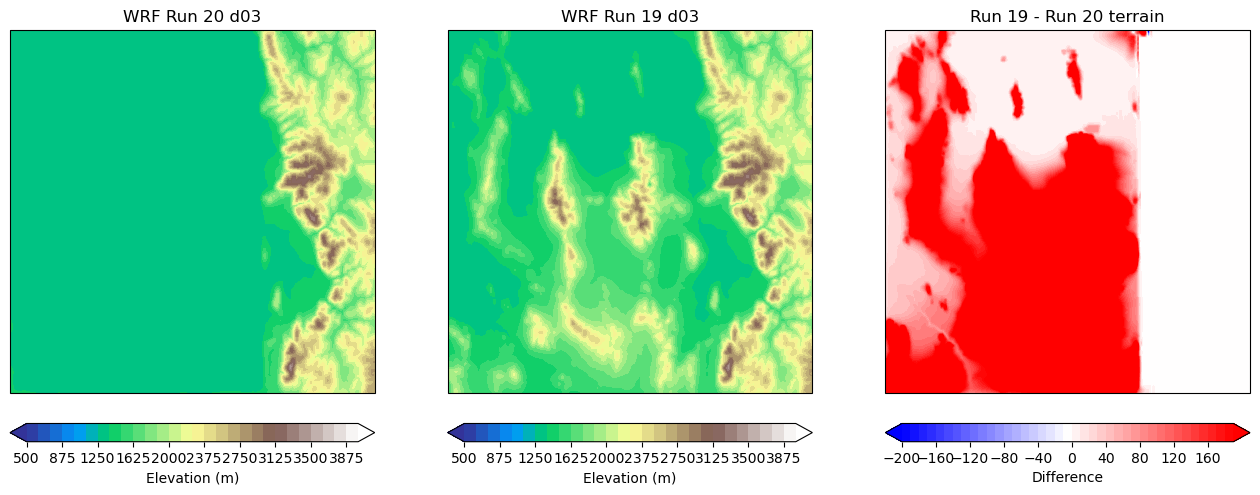

In [5]:
terr_diff = ter_d03_run2.values - ter_d03_run1.values

fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,facecolor = 'white',edgecolor = 'k', figsize = (16, 8), subplot_kw = {'projection' : cart_proj_run2})

pad = 0.05
################################ ax1 - run1 d03 ############################################
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
ax1.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# d03 set limits
ax1.set_xlim([xlim_d03_run1[0], xlim_d03_run1[1]])
ax1.set_ylim([ylim_d03_run1[0], ylim_d03_run1[1]])

# Plot terrain height
plot = ax1.contourf(ter_d03_run1.XLONG.values, ter_d03_run1.XLAT.values, ter_d03_run1.values, cmap = 'terrain', 
                    transform=ccrs.PlateCarree(), levels = np.arange(500,4001,125), extend = 'both')

# Title
ax1.set_title(f'WRF Run {run1} d03')

plt.colorbar(plot, ax = ax1, orientation = 'horizontal', label = 'Elevation (m)', pad = pad)



################################ ax2 - run2 d03 ############################################
ax2.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
ax2.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
ax2.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# d03 set limits
ax2.set_xlim([xlim_d03_run2[0], xlim_d03_run2[1]])
ax2.set_ylim([ylim_d03_run2[0], ylim_d03_run2[1]])

# Plot terrain height
plot = ax2.contourf(ter_d03_run2.XLONG.values, ter_d03_run2.XLAT.values, ter_d03_run2.values, cmap = 'terrain', 
                    transform=ccrs.PlateCarree(), levels = np.arange(500,4001,125), extend = 'both')

# Title
ax2.set_title(f'WRF Run {run2} d03')

plt.colorbar(plot, ax = ax2, orientation = 'horizontal', label = 'Elevation (m)', pad = pad)


################################ ax3 - difference d03 ############################################
ax3.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
ax3.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
ax3.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# d03 set limits
ax3.set_xlim([xlim_d03_run2[0], xlim_d03_run2[1]])
ax3.set_ylim([ylim_d03_run2[0], ylim_d03_run2[1]])

# Plot terrain height difference
plot = ax3.contourf(ter_d03_run2.XLONG.values, ter_d03_run2.XLAT.values, terr_diff, cmap = 'bwr', 
                    transform=ccrs.PlateCarree(), levels = np.arange(-200,200,10), extend = 'both')

# Title
ax3.set_title(f'Run {run2} - Run {run1} terrain')

cb = plt.colorbar(plot, ax = ax3, orientation = 'horizontal', label = 'Difference', pad = pad)

plt.savefig(Fig_dir1 + f'Terrain_Diff_WRF{run2}_WRF{run1}_d03.png', dpi = 300, bbox_inches = 'tight')
plt.savefig(Fig_dir2 + f'Terrain_Diff_WRF{run2}_WRF{run1}_d03.png', dpi = 300, bbox_inches = 'tight')
plt.show()